In [29]:
import torch
import urllib
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [30]:
# using Gpu device if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}.")
device

Running on cuda.


device(type='cuda')

In [31]:
# Load the DeepLab v3 model from modelhub pytorch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# We deploy the model to evaluate the images
model.eval()

Using cache found in C:\Users\danie/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [32]:
# Downloading an image to use it

#url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
url, filename = ("https://github.com/danielrawlins21/Artificial_Vision/blob/main/Projects/Objectives/Detection%20object/img.JPG?raw=true", "img.JPG")

urllib.request.urlretrieve(url, filename) #sample execution 

('img.JPG', <http.client.HTTPMessage at 0x1a803c14dd0>)

In [33]:
# Opening the image and convert it to RGB
input_image = Image.open(filename)
input_image = input_image.convert("RGB")


In [34]:
# Modifying the dimensions of this image to fit with the input
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 

In [35]:
# Activating GPU hardware acceleration
if torch.cuda.is_available():
    input_batch = input_batch.to(device)
    model.to(device)

In [36]:
# Run the inference over the image
with torch.no_grad():
    output = model(input_batch)['out'][0]


# Save the values of the prediction with the most probs
output_predictions = output.argmax(0)

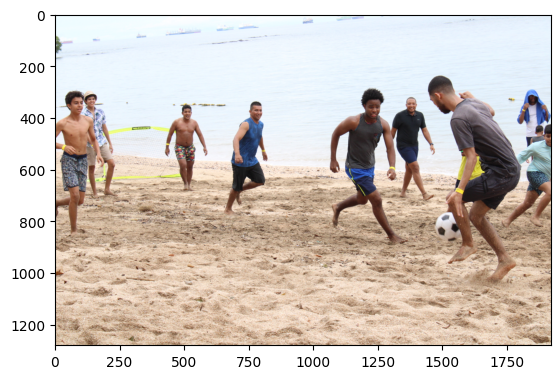

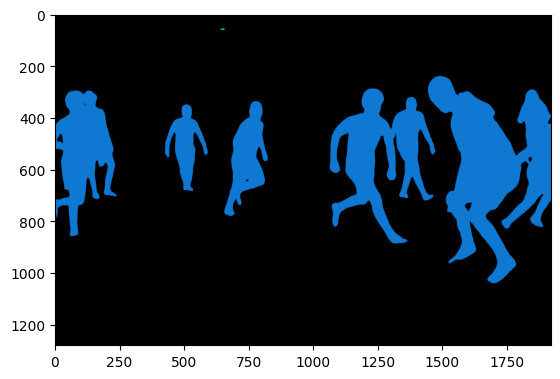

In [37]:
# At least we create a color palette for each class which could be colored
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")


# Generating an output image with the predictions
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)
plt.imshow(input_image)
plt.show()
plt.imshow(r)
plt.show()